In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

> **Exploratory Data Analysis (EDA)** is the process of analyzing and visualizing data to understand its main characteristics before applying modeling techniques.
- EDA helps you:
    - Summarize data using statistics (mean, median, etc.)
    - Detect patterns, trends, and anomalies
    - Identify missing values and outliers
    - Visualize distributions and relationships (using plots like histograms, boxplots, scatter plots)

> Purpose:- To gain insights, guide further analysis, and inform data cleaning or feature engineering steps.

> The main types of Exploratory Data Analysis (EDA) are:

1. Univariate Analysis

    - Examines one variable at a time.
    - Uses: histograms, boxplots, summary statistics (mean, median, std dev).

2. Bivariate Analysis

    - Examines the relationship between two variables.
    - Uses: scatter plots, correlation matrices, cross-tabulation.

3. Multivariate Analysis

    - Examines relationships among three or more variables.
    - Uses: pair plots, heatmaps, 3D scatter plots, group comparisons.

4. Graphical Analysis

    - Uses visualizations to explore data patterns.
    - Examples: bar charts, line plots, boxplots, scatter plots, heatmaps.

5. Non-graphical Analysis

    - Uses summary statistics and numerical tables.
    - Examples: mean, median, standard deviation, frequency tables, correlation coefficients.

These types help you understand data distributions, detect patterns, identify outliers, and guide feature engineering and modeling decisions.

In [113]:
data = pd.read_csv("co2.csv")
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [114]:
data.info()
print("The shape is: ", data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [115]:
data.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [116]:
print("Total null values are: ", data.isna().sum().sum())

print("Total duplicate values are: ", data.duplicated())

data = data.loc[~data.duplicated()] \
.reset_index(drop=True).copy()

print("New size is: ", data.shape)

Total null values are:  0
Total duplicate values are:  0       False
1       False
2       False
3       False
4       False
        ...  
7380    False
7381    False
7382    False
7383    False
7384    False
Length: 7385, dtype: bool
New size is:  (6282, 12)


> **Univariate analysis** is the statistical analysis of a single variable.
- It focuses on describing and summarizing the main features of one variable at a time, using measures like:
    - Central tendency (mean, median, mode)
    - Dispersion (range, variance, standard deviation)
    - Distribution (histograms, boxplots)
> Purpose:
    - To understand the basic characteristics and patterns of a single variable without considering relationships with other variables.

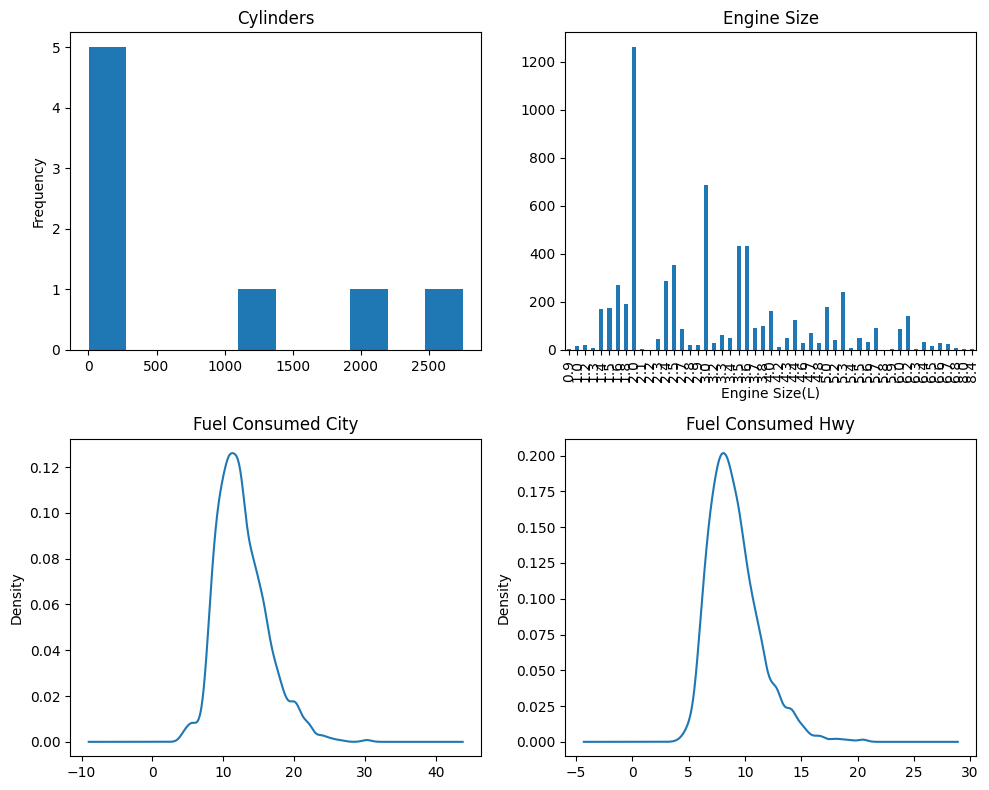

In [117]:
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)
data["Cylinders"].value_counts().sort_index(ascending=True).head(10).plot(kind='hist', title='Cylinders')
plt.subplot(2, 2, 2)
data["Engine Size(L)"].value_counts().sort_index(ascending=True).plot(kind='bar', title='Engine Size')
plt.subplot(2, 2, 3)
data["Fuel Consumption City (L/100 km)"].plot(kind='kde', title='Fuel Consumed City')
plt.subplot(2, 2, 4)
data["Fuel Consumption Hwy (L/100 km)"].plot(kind='kde', title='Fuel Consumed Hwy')
plt.tight_layout()
plt.show()

In [118]:
numerical_cols = data.select_dtypes(include=['number']).columns
for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Mean: {data[col].mean():.2f}", end="\t")
    print(f"  Median: {data[col].median():.2f}", end="\t")
    print(f"  Std Dev: {data[col].std():.2f}", end="\t")
    print(f"  Min: {data[col].min():.2f}", end="\t")
    print(f"  Max: {data[col].max():.2f}", end="\t")
data.select_dtypes(include=['number']).columns


Engine Size(L):
  Mean: 3.16	  Median: 3.00	  Std Dev: 1.37	  Min: 0.90	  Max: 8.40	
Cylinders:
  Mean: 5.62	  Median: 6.00	  Std Dev: 1.85	  Min: 3.00	  Max: 16.00	
Fuel Consumption City (L/100 km):
  Mean: 12.61	  Median: 12.10	  Std Dev: 3.55	  Min: 4.20	  Max: 30.60	
Fuel Consumption Hwy (L/100 km):
  Mean: 9.07	  Median: 8.70	  Std Dev: 2.28	  Min: 4.00	  Max: 20.60	
Fuel Consumption Comb (L/100 km):
  Mean: 11.02	  Median: 10.60	  Std Dev: 2.95	  Min: 4.10	  Max: 26.10	
Fuel Consumption Comb (mpg):
  Mean: 27.41	  Median: 27.00	  Std Dev: 7.25	  Min: 11.00	  Max: 69.00	
CO2 Emissions(g/km):
  Mean: 251.16	  Median: 246.00	  Std Dev: 59.29	  Min: 96.00	  Max: 522.00	

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [119]:
#Removing the Fuel Consumption Comb (mpg) since its repeated...
df = data.drop("Fuel Consumption Comb (mpg)", axis=1)
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


In [134]:
# Keeping Only Numeric Data
df = df[df.select_dtypes(include=['number']).columns]
df.head()
df=df.drop("Fuel Consumption Comb (L/100 km)", axis=1)

column = list(df.columns)
for reference in column:
    column = list(df.columns)
    column.remove(reference)
    print(column)

    plt.figure(figsize=(12, 5*5))

    for idx, col in enumerate(column):
        plt.subplot(5, 1, idx+1)
        plt.scatter(df[col], df[reference], alpha=0.6)
        plt.xlabel(col)
        plt.ylabel(reference)
        plt.title(f"{col} vs {reference}")
    print('\033[92m' + f"Current Reference: {reference}" + '\033[0m')
    plt.tight_layout()
    plt.show()

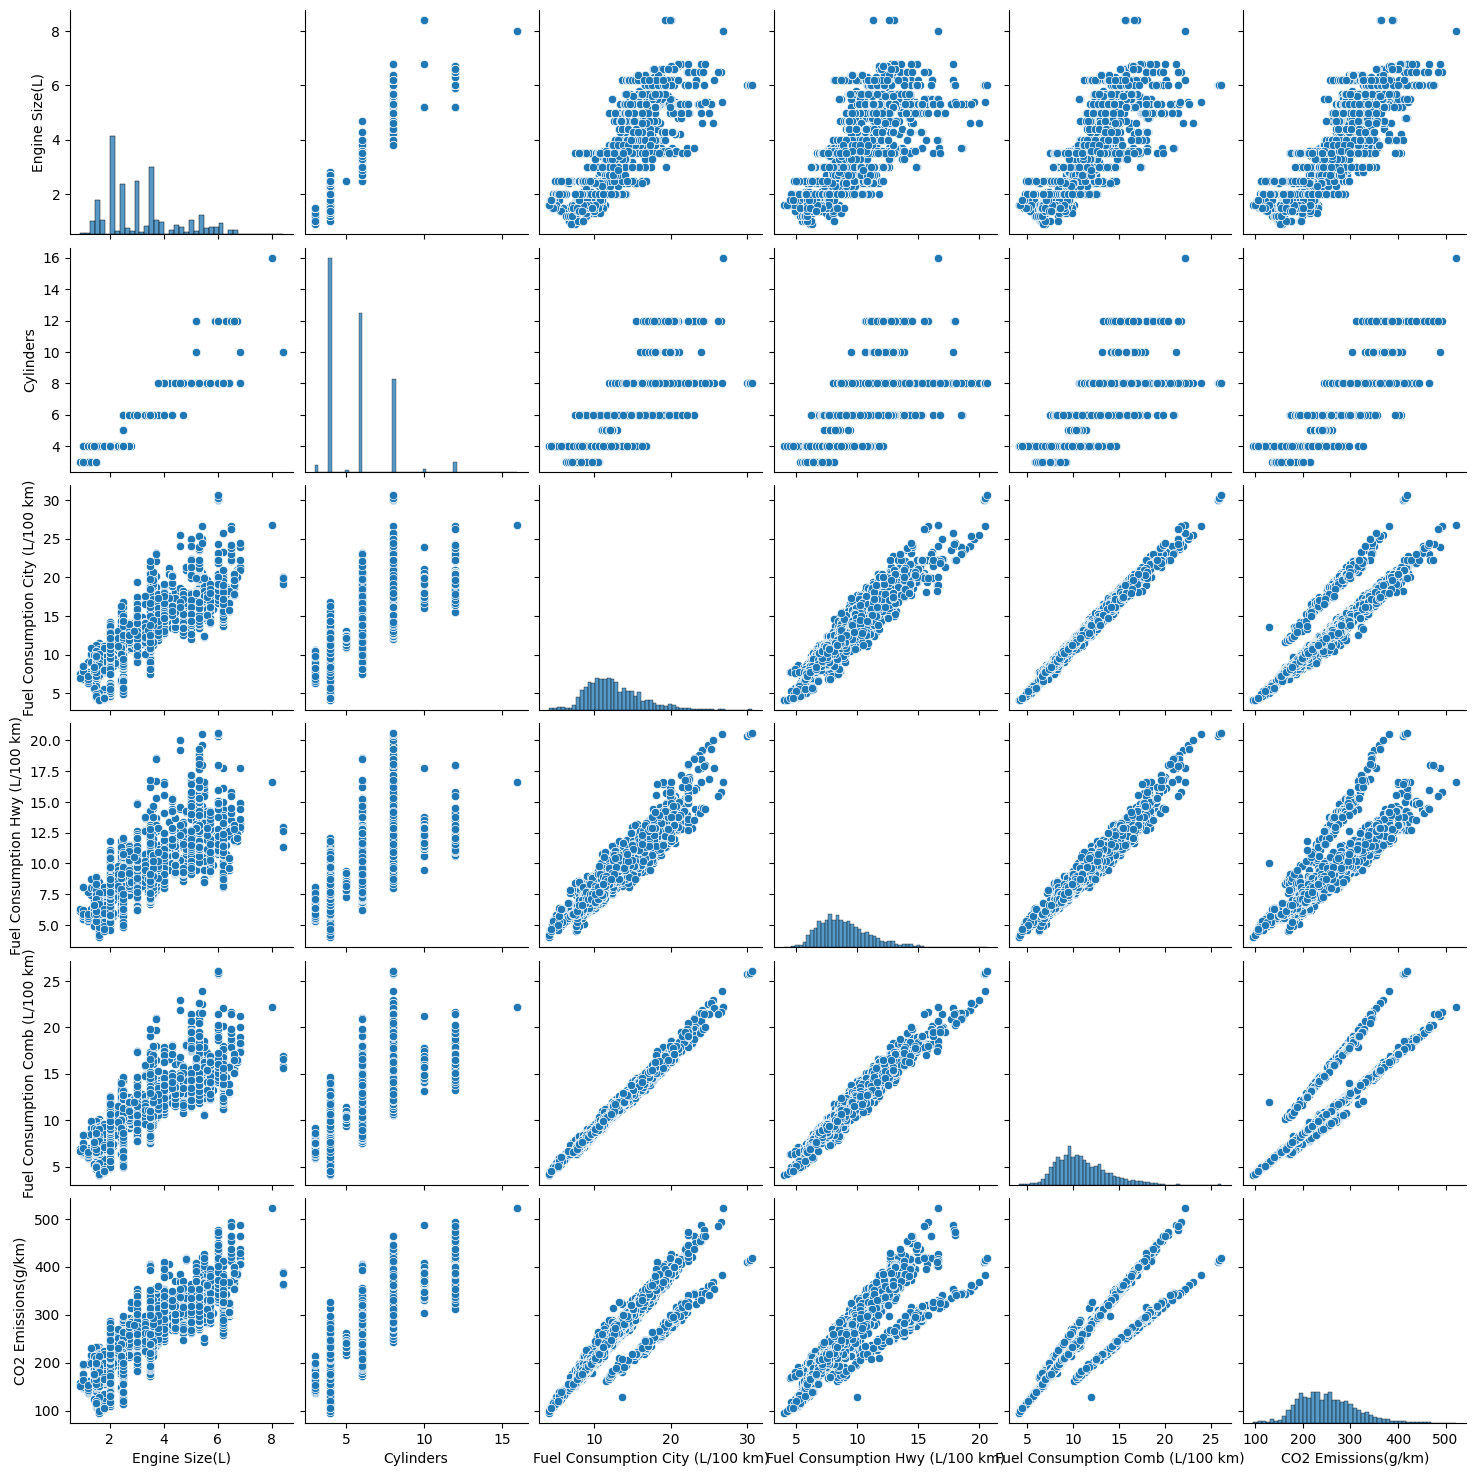

In [122]:
import seaborn as sns

sns.pairplot(df, vars=list(df.columns))

> Correlation is a statistical measure that shows the strength and direction of the relationship between two variables.

> Key Points:

- Range: -1 to +1

    - +1 = Perfect positive correlation (both increase together)
    - 0 = No correlation (no relationship)
    - -1 = Perfect negative correlation (one increases, other decreases)

- Strength:

    - 0.7 to 1.0 = Strong correlation
    - 0.3 to 0.7 = Moderate correlation
    - 0.0 to 0.3 = Weak correlation

In [123]:
df_corr = df[list(df.columns)].dropna().corr()

<Axes: >

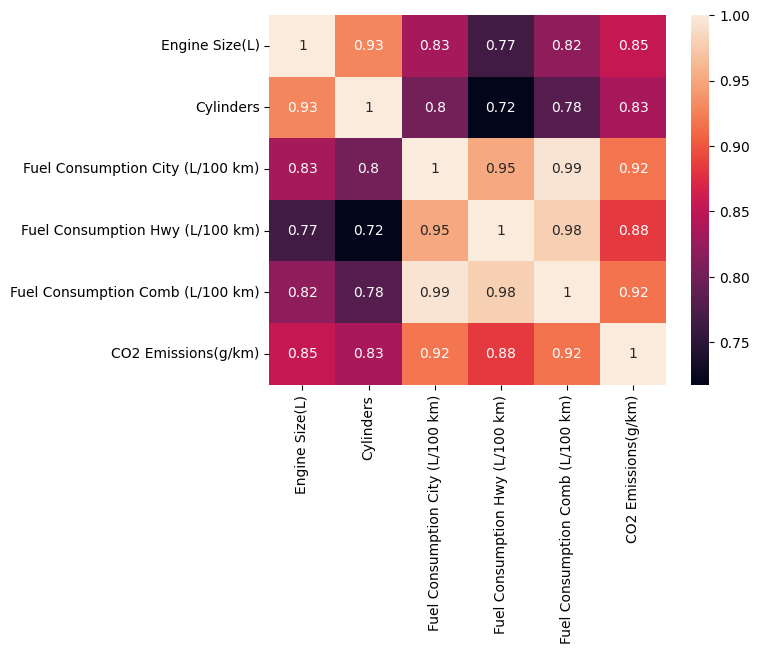

In [124]:
sns.heatmap(df_corr, annot=True)

## APPLYING GRADIENT DESCENT

In [135]:
X = df.drop("CO2 Emissions(g/km)", axis=1)
Y = df["CO2 Emissions(g/km)"]

In [ ]:
X = X.values
Y = Y.values.reshape(-1, 1)
print(X)
print(Y)

[[ 2.   4.   9.9  6.7]
 [ 2.4  4.  11.2  7.7]
 [ 1.5  4.   6.   5.8]
 ...
 [ 2.   4.  11.7  8.6]
 [ 2.   4.  11.2  8.3]
 [ 2.   4.  12.2  8.7]]
[[196]
 [221]
 [136]
 ...
 [240]
 [232]
 [248]]


In [137]:
w = np.zeros((X.shape[1],1))
b = 0
print(w)
print(b)

[[0.]
 [0.]
 [0.]
 [0.]]
0


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km)
0,2.0,4.0,9.9,6.7
1,2.4,4.0,11.2,7.7
2,1.5,4.0,6.0,5.8
3,3.5,6.0,12.7,9.1
4,3.5,6.0,12.1,8.7
...,...,...,...,...
6277,2.0,4.0,10.7,7.7
6278,2.0,4.0,11.2,8.3
6279,2.0,4.0,11.7,8.6
6280,2.0,4.0,11.2,8.3


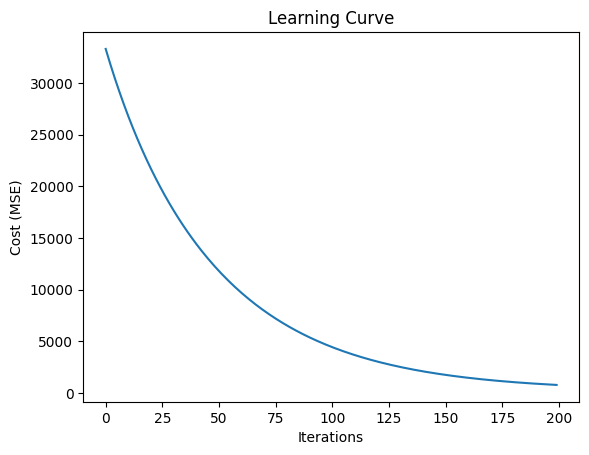

array([[165.30338085],
       [182.60063095],
       [135.17692096],
       ...,
       [187.86754762],
       [183.25658732],
       [191.02370067]])

In [138]:
alpha = 0.01
iterations = 200
X_scale = (X - X.mean(axis=0)) / X.std(axis=0) 
display(pd.DataFrame(X, columns=df.drop("CO2 Emissions(g/km)", axis=1).columns))
#X-mean/standarddeviation
#Scaling the feature
cost_history = []
m = X_scale.shape[0]

for i in range(iterations):

    y_pred = np.dot(X_scale, w) + b
    
    error = y_pred - Y
    
    dW = (1/m) * np.dot(X_scale.T, error) # When we transpose rows become feature and column becomes transpose 
    db = (1/m) * np.sum(error)     # it is similar to the single elemnt case but we can't take X we need to transpose it for the data
    
    w = w - alpha * dW
    b = b - alpha * db

    cost = (1/(2*m)) * np.sum(error**2)
    cost_history.append(cost)

y_pred = np.dot(X_scale, w) + b
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Learning Curve")
plt.show()
y_pred

In [139]:
ss_res = np.sum((Y - y_pred)**2)  # Residual Sum of Squares
ss_tot = np.sum((Y - np.mean(y_pred))**2)  # Total Sum of Squares
r2 = 1 - (ss_res/ss_tot) 
print(r2)

0.6627772061069186


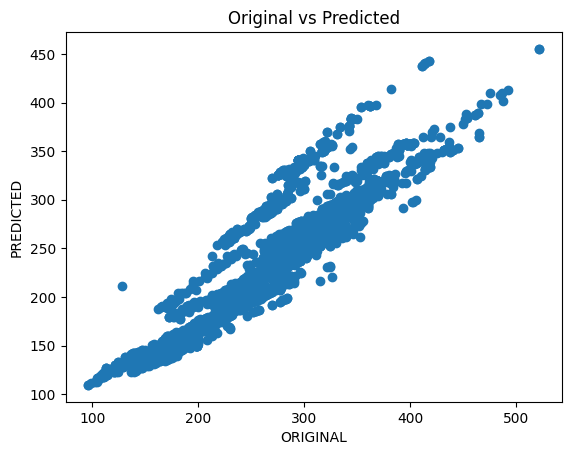

In [130]:
plt.scatter(x=Y, y=y_pred)
plt.xlabel("ORIGINAL")
plt.ylabel("PREDICTED")
plt.title("Original vs Predicted")
plt.show()

In [ ]:
# Learning rate scheduler
# 